<a href="https://colab.research.google.com/github/alejandro-cermeno/2021_Market_Timing-Cermeno/blob/main/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROAD MAP**


---

**1. Visualización de datos**

  a. Subgráficos de precios (CHECK)

  c. Subgráficos de retornos (CHECK)

  d. Subgráficos de correlaciones (CHECK)

  e. Subgraficos de distribuciones (CHECK)

  f. Subgráfico de retornos^2 (CHECK)

In [28]:
# Librerias

import math
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# Obtencion de datos

path = 'https://git.io/Jnovh'
df = pd.read_excel(path, sheet_name = 'source', index_col = 0)

# Etiquetas

market = ['MERVAL', 'IBOV', 'IPSA', 'IGBC', 'MEXBOL', 'SPBLPGPTR']
country = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', '(e) Mexico', '(f) Peru']

## **Funciones**

In [29]:
def price2ret(price):

  '''

  Convierte los datos contenidos en la serie en price de niveles a retornos.
  Requiere numpy.

  Entradas:

    price: (array_like) Serie de precios. 

  '''
  
  ret = (100 * (np.log(price) - np.log(price.shift(1))))
  
  return ret


###############################################################################
#---------------------------------- PRECIOS -----------------------------------
###############################################################################

def graf_precio(df, country):

  '''
  Realiza subgraficos de las series en niveles para un df. La función requiere 
  que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

      # Etiquetas

    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


###############################################################################
#--------------------------------- RETORNOS -----------------------------------
###############################################################################


def graf_ret(df, country, ret2):

  '''
  Realiza subgraficos de las series de retornos contenidas en un df. La función
  requiere que el índice sea una columna fecha. Asi mismo, se requiere numpy, 
  pandas y matplotlib.

  Entradas:

    df      (array_like) Series a graficar. 

    country (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    ret2    (bool) Si 'True' grafica los retornos al cuadrado. '
  
    type    (str) 
  '''

  # Verifica si se solicita el grafico de los retornos al cuadrado

  if ret2 == False:
    power = 1
  elif ret2 == True:
    power = 2
 
  df = df ** power # Para retornos^2, si es solicitado

  # Dimensiones subgrafico
    
  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()   # Serie

    # Subgrafico

    ax.plot(serie)

    # Preferencias

      # Limites horizontales
    ax.set_xlim([serie.index[0],serie.index[-1]]) 

      # Limites verticales 
    if ret2 == False:              # Se omite si son ret^2

      maxL = max(serie)
      minL = min(serie)

      rang = max(maxL, abs(minL))
      A = round(rang/10.0) * 10 + 10
      ax.set_ylim([-A, A])

    else:
      ax.set_ylim(0)

      # Etiquetas

    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    
    ax.grid(color="grey", linestyle="--", linewidth=0.5)


###############################################################################
#------------------------- DENSIDAD -------------------------------------------
###############################################################################


def grafs_densidad(df, country, market):

  '''

  Realiza subgraficos de la funciones de densidad para las series contenidas 
  en df. Se requiere numpy, math, pandas, scipy.stats y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

    market   (str, opc) Nombres de los mercados a mostrarse en cada subgrafico.

  '''
  
  # Distribucion normal

  mu = 0
  variance = 1
  sigma = math.sqrt(variance)
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2   
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie = df[col].dropna()                    # Serie

    # Subgrafico

    ax.plot(x, stats.norm.pdf(x, mu, sigma), label  =r'$\mathcal{N}(0,1)$',
            linestyle = '--', color = 'k')
    
    serie.plot(ax=ax, kind='kde', label = market[df.columns.get_loc(col)], 
               color = 'k')

    # Preferencias

    ax.set_ylabel('')
    ax.set_ylim(0)
    ax.set_xlabel(" $\it{"+country[df.columns.get_loc(col)]+"}$",
                  fontname= 'Times New Roman', fontsize=12) 
    ax.legend()


###############################################################################
#-------------------------------- AUTOCORRELOGRAMA ----------------------------
###############################################################################


def grafs_acf(df, country):

  '''

  Realiza subgraficos del autocorrelograma para las series contenidas en df. 
  Se requiere numpy, pandas, statsmodels y matplotlib.

  Entradas:

    df       (array_like) Series a graficar. 

    country  (str, opc) Nombres de los países a mostrarse en cada subgrafico.

  '''

  # Dimensiones subgrafico

  nrows = np.ceil(df.shape[1] / 2).astype(int) 
  ncols = 2  
  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  # Generacion de subgraficos 

  for col, ax in zip(df.columns, axes.flatten()):

    serie  = df[col].dropna()                      # serie

    # Subgrafico

    sm.graphics.tsa.plot_acf(serie.values, ax = ax, lags = 50, 
                             color = 'black', title = " $\it{"+country\
                             [df.columns.get_loc(col)]+"}$")
    
    # Preferencias

    ax.grid(color="grey", linestyle="--", linewidth=0.5)

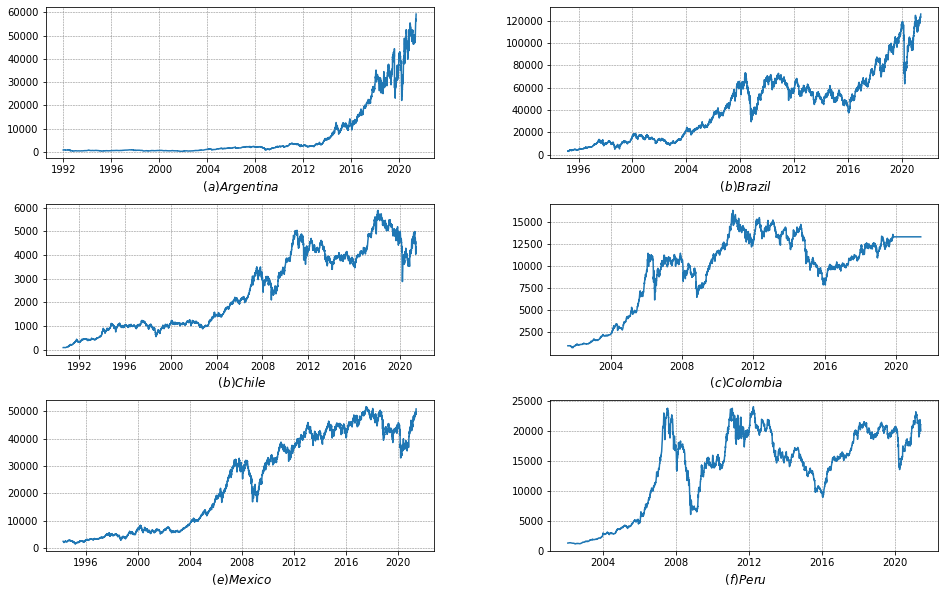

In [30]:
graf_precio(df, country)
plt.savefig('a.pdf')

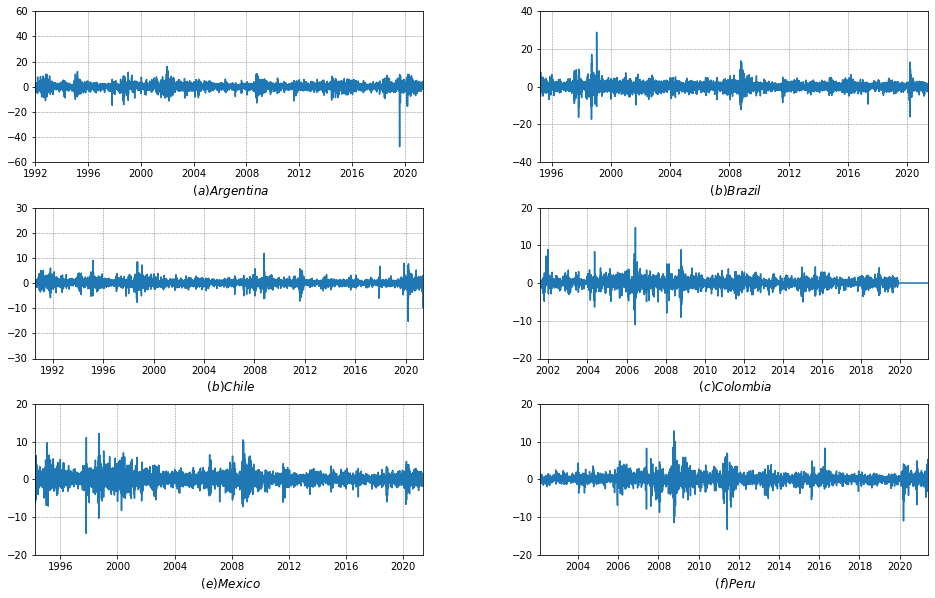

In [31]:
ret = price2ret(df)

graf_ret(ret, country, ret2 = False)

plt.savefig('b.pdf')

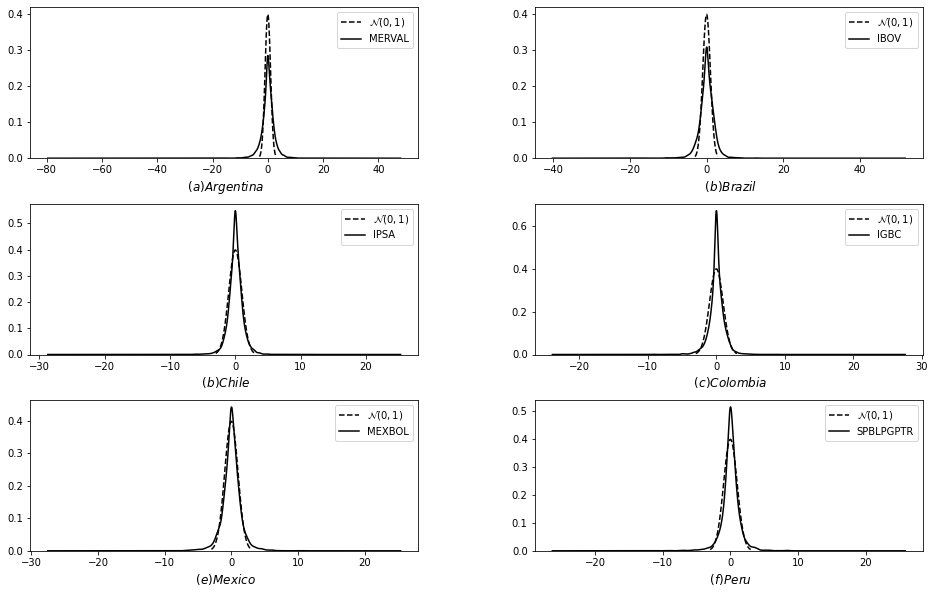

In [32]:
grafs_densidad(ret, country, market)

plt.savefig('c.pdf')

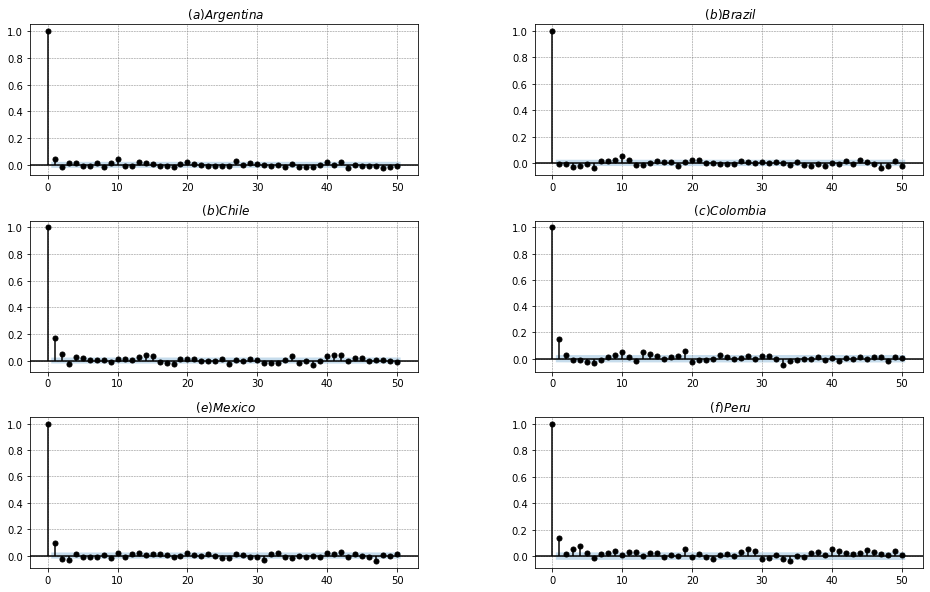

In [33]:
grafs_acf(ret, country)

plt.savefig('d.pdf')

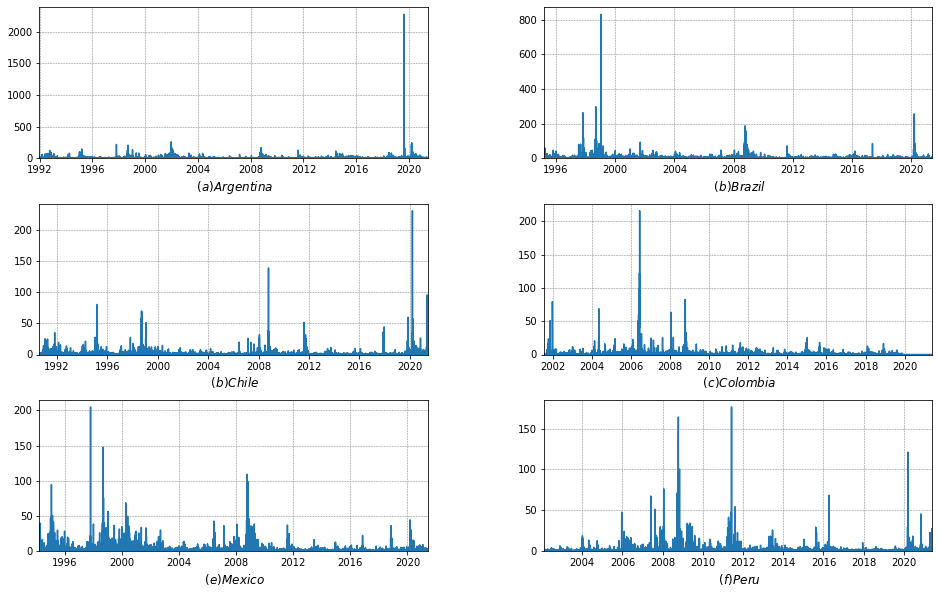

In [34]:
graf_ret(ret, country, ret2 = True)

plt.savefig('e.pdf')

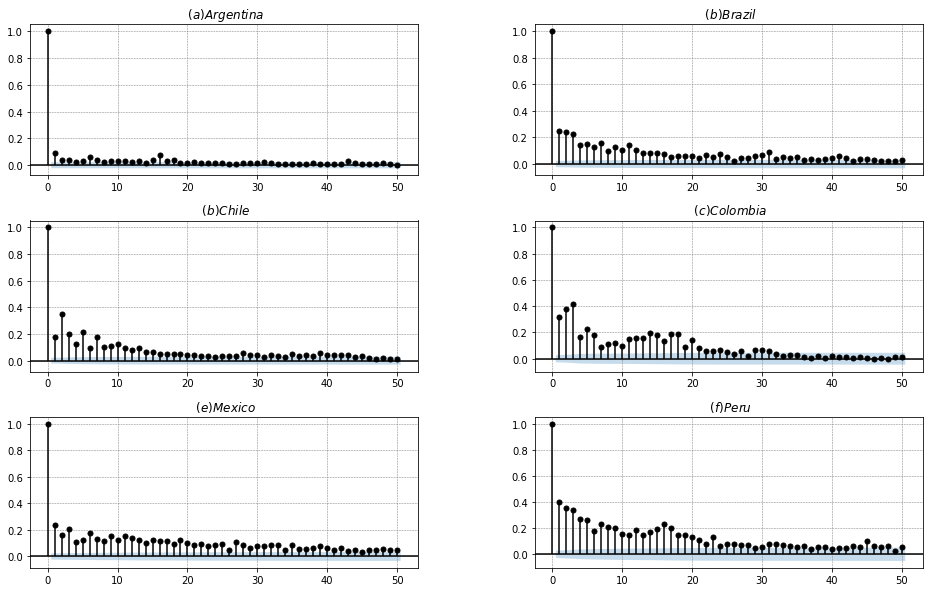

In [35]:
grafs_acf(ret ** 2, country)
plt.savefig('f.pdf')

In [38]:
# Unir PDFs

# Instalacion 

!pip install PyPDF2

# Librerias

from string import ascii_lowercase
from PyPDF2 import PdfFileMerger

open('graficos.pdf', 'w')                  # Se crea un PDF vacío 

merger = PdfFileMerger()                   # Se uniran los PDFs de cada grafico

for i in range(0, 6):

    merger.append(ascii_lowercase[i]+'.pdf')

merger.write('graficos.pdf')
merger.close()